In [1]:
import numpy as np
import statsmodels.api as sm
import scipy
import pandas
import pandasql
import matplotlib.pyplot as plt
import datetime
import time as t

In [2]:
df = pandas.read_csv('~/Desktop/Computer Science/Data Science/Udacity Nanodegree/Project 2/turnstile_data_master_with_weather.csv')

# Section 1. Statistical Test

In [3]:
with_rain_data = df['ENTRIESn_hourly'][df['rain'] == 1]
without_rain_data = df['ENTRIESn_hourly'][df['rain'] == 0]
with_rain_mean = np.mean(with_rain_data)
without_rain_mean = np.mean(without_rain_data)
U, p = scipy.stats.mannwhitneyu(with_rain_data, without_rain_data)

print with_rain_mean, without_rain_mean, U, p

1105.44637675 1090.27878015 1924409167.0 0.0249999127935


1.1 Which statistical test did you use to analyze the NYC subway data? Did you use a one-tail or a two-tail P value? What is the null hypothesis? What is your p-critical value?

I used the Mann-Whitney U-Test, because the data did not seem normally distributed. I used a two-tail P value, because I was just trying to figure out if ridership changed on rainy vs non-rainy days. The null hypothesis was that the ridership did not change significantly during rainy days. My p-critical value was 0.05, or 5%.

1.2 Why is this statistical test applicable to the dataset? In particular, consider the assumptions that the test is making about the distribution of ridership in the two samples.

I used the Mann-Whitney U-Test, because the data (as shown on exercise 3.1) seem normally-distributed.  Thus,I needed a non-parametric test that test null hypothesis among two similar populations.

1.3 What results did you get from this statistical test? These should include the following numerical values: p-values, as well as the means for each of the two samples under test.

Mean ridership with rain: 1105.4463767458733
Mean ridership without rain: 1090.278780151855
P-value: 0.024999912793489721

1.4 What is the significance and interpretation of these results?

Since 2.5% is below my p-critical value, I can reject the null hypothesis and conclude, with at least 95% confidence, that there is significant difference in ridership when it rains.

# Section 2. Linear Regression

2.1 What approach did you use to compute the coefficients theta and produce prediction for ENTRIES n_hourly in your regression model:
1.	OLS using Statsmodels or Scikit Learn
2.	Gradient descent using Scikit Learn
3.	Or something different?

I used OLS using Statsmodel.

2.2 What features (input variables) did you use in your model? Did you use any dummy variables as part of your features?

I selected the following features for my model:
• rain
• fog
• Hour
• mean temperature ('meantempi')
• mean wind speed ('meanwindspdi')

I used the default dummy variable provided by the original model: UNIT.

2.3 Why did you select these features in your model? We are looking for specific reasons that lead you to believe that
the selected features will contribute to the predictive power of your model.
•	Your reasons might be based on intuition. For example, response for fog might be: “I decided to use fog because I thought that when it is very foggy outside people might decide to use the subway more often.”
•	Your reasons might also be based on data exploration and experimentation, for example: “I used feature X because as soon as I included it in my model, it drastically improved my R2 value.”  

I first selected features based on intuition, then I test them out by adding those features into the model and seeing if it improved my R2 value. I selected fog and mean wind speed, because I figured that people would be less likely to drive and more likely to use the subway if the weather is really bad. I selected mean tempearture because I thought because would be less likely to walk and take the subway if the temperature was really high.

2.4 What are the parameters (also known as "coefficients" or "weights") of the non-dummy features in your linear regression model?

In [16]:
def linear_regression(features, values):
    features = sm.add_constant(features)
    model = sm.OLS(values, features)
    results = model.fit()
    intercept = results.params[0]
    params = results.params[1:]
    return intercept, params

features = df[['rain', 'fog', 'Hour', 'meantempi', 'meanwindspdi']]
values = df['ENTRIESn_hourly']

print linear_regression(features, values)

(698.87562030242998, rain            -45.342728
fog             118.158293
Hour             59.493260
meantempi        -6.271177
meanwindspdi     26.462448
dtype: float64)


rain            -45.342728
fog             118.158293
Hour             59.493260
meantempi        -6.271177
meanwindspdi     26.462448

In [17]:
def predictions(dataframe):
    features = dataframe[['rain', 'fog', 'Hour', 'meantempi', 'meanwindspdi']]
    dummy_units = pandas.get_dummies(dataframe['UNIT'], prefix='unit')
    features = features.join(dummy_units)
    
    values = dataframe['ENTRIESn_hourly']

    intercept, params = linear_regression(features, values)
    
    predictions = intercept + np.dot(features, params)
    return predictions

print predictions(df)

[ 3355.90602719  3625.50380408  3895.10158097 ...,   825.47285908
   825.47285908   825.47285908]


2.5 What is your model’s R2 (coefficients of determination) value?

In [18]:
def compute_r_squared(data, predictions):
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(data, predictions)
    r_squared = r_value**2
    
    return r_squared

print compute_r_squared(df['ENTRIESn_hourly'], predictions(df))

0.458611756916


My R2 value (from Udacity IDLE) is 0.480360774033.

2.6 What does this R2 value mean for the goodness of fit for your regression model? Do you think this linear model to predict ridership is appropriate for this dataset, given this R2 value?

The close my R2 value is to 1, the better the fit of my regression model. To determine its appropriateness for predicting ridership, it might be more useful to plot the residuals.

Populating the interactive namespace from numpy and matplotlib


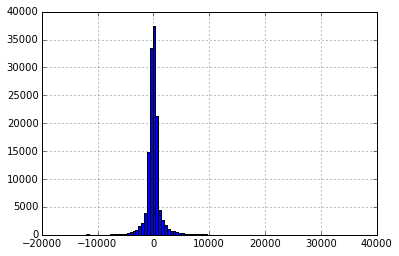

In [11]:
%pylab inline

plt.figure()
(df['ENTRIESn_hourly'] - predictions(df)).hist(bins=100)
plt.show()

The histogram shows that the majority of the predictions are good (shown by the high frequency around '0' residuals in the x-axis). However, there are times where the residuals get higher. However, given the normal distribution of the residuals, it is safe to conclude that a linear model is most appropriate in determining ridership.

# Section 3. Visualization

Please include two visualizations that show the relationships between two or more variables in the NYC subway data.
Remember to add appropriate titles and axes labels to your plots. Also, please add a short description below each figure commenting on the key insights depicted in the figure.

3.1 One visualization should contain two histograms: one of  ENTRIESn_hourly for rainy days and one of ENTRIESn_hourly for non-rainy days.

•	You can combine the two histograms in a single plot or you can use two separate plots.
•	If you decide to use to two separate plots for the two histograms, please ensure that the x-axis limits for both of the plots are identical. It is much easier to compare the two in that case.
•	For the histograms, you should have intervals representing the volume of ridership (value of ENTRIESn_hourly) on the x-axis and the frequency of occurrence on the y-axis. For example, each interval (along the x-axis), the height of the bar for this interval will represent the number of records (rows in our data) that have ENTRIESn_hourly that falls in this interval.
•	Remember to increase the number of bins in the histogram (by having larger number of bars). The default bin width is not sufficient to capture the variability in the two samples.

In [8]:
from ggplot import *

plot = ggplot(aes(x='ENTRIESn_hourly', fill='rain', data=df)) + geom_bar(bin_width=200)
    
print plot

TypeError: __init__() takes exactly 3 arguments (2 given)

3.2 One visualization can be more freeform. You should feel free to implement something that we discussed in class (e.g., scatter plots, line plots) or attempt to implement something more advanced if you'd like. Some suggestions are:
•	Ridership by time-of-day
•	Ridership by day-of-week

# Section 4. Conclusion

4.1 From your analysis and interpretation of the data, do more people ride
the NYC subway when it is raining or when it is not raining?  

4.2 What analyses lead you to this conclusion? You should use results from both your statistical
tests and your linear regression to support your analysis.

# Section 5. Reflection

5.1 Please discuss potential shortcomings of the methods of your analysis, including:

1.	Dataset,
2.	Analysis, such as the linear regression model or statistical test.

This dataset is only for the month of May, so naturally, I would not feel confident in extrapolating any preliminary conclusions on the effects on ridership across other months (especially since time of the year has big effects on weather, temperature, holidays, etc.)

From my analysis, I would also be aware of multicollinearity among the features I picked.  For example, rain, mean temperature, fog, mean wind speed all have strong linear relationship with one another.